# deskripsi library yang digunakan

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [171]:
df = pd.read_csv('bodyfat.csv')

# Deskripsi Dataset

Variabel yang tercantum di bawah ini adalah:

Density     : Kepadatan ditentukan dari penimbangan bawah air

Body Fat    : Persentase lemak tubuh.

Age         : Umur (tahun)

Weight      : Berat Badan (lbs)

Height      : Tinggi Badan (inches)

Neck        : Lingkar Leher (cm)

Chest       : Lingkar Dada (cm)

Abdomen     : Lingkar Perut 2 (cm)

Hip         : Lingkar Pinggul (cm)

Thigh       : Lingkar Paha (cm)

Knee        : Lingkar Lutut (cm)

Ankle       : Lingkar Pergelangan Kaki (cm)

Biceps      : Lingkar Bisep (cm)

Forearm     : Lingkar Lengan Bawah (cm)

Wrist       : Lingkar Pergelangan Tangan (cm)

In [172]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


<Axes: >

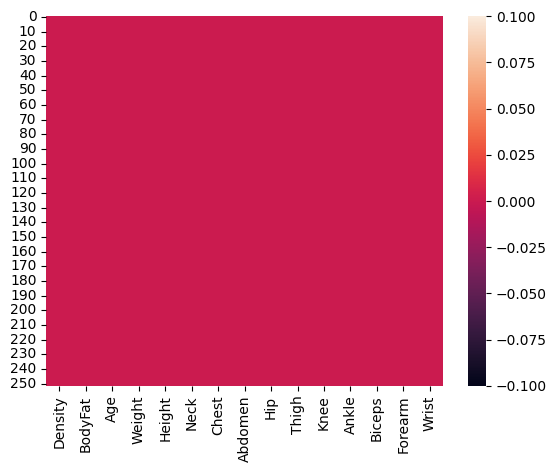

In [174]:
sns.heatmap(df.isnull())

In [175]:
df.duplicated().sum()

0

In [176]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Density,252.0,1.055574,0.019031,0.995,1.0414,1.0549,1.0704,1.1089
BodyFat,252.0,19.150794,8.368740,0.000,12.4750,19.2000,25.3000,47.5000
Age,252.0,44.884921,12.602040,22.000,35.7500,43.0000,54.0000,81.0000
Weight,252.0,178.924405,29.389160,118.500,159.0000,176.5000,197.0000,363.1500
Height,252.0,70.148810,3.662856,29.500,68.2500,70.0000,72.2500,77.7500
Neck,252.0,37.992063,2.430913,31.100,36.4000,38.0000,39.4250,51.2000
Chest,252.0,100.824206,8.430476,79.300,94.3500,99.6500,105.3750,136.2000
Abdomen,252.0,92.555952,10.783077,69.400,84.5750,90.9500,99.3250,148.1000
Hip,252.0,99.904762,7.164058,85.000,95.5000,99.3000,103.5250,147.7000
Thigh,252.0,59.405952,5.249952,47.200,56.0000,59.0000,62.3500,87.3000


# Visualisasi Data

<Axes: >

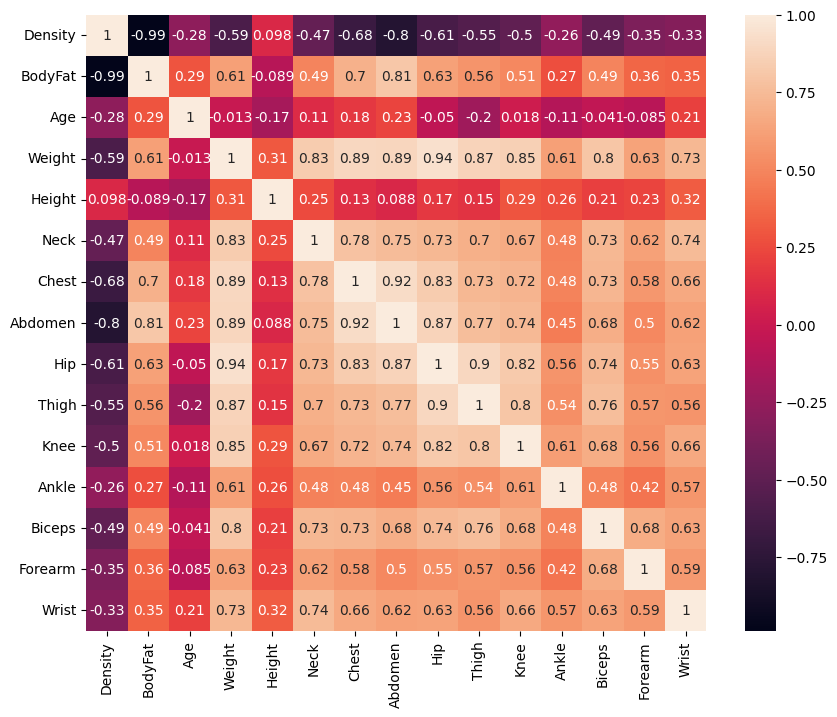

In [177]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

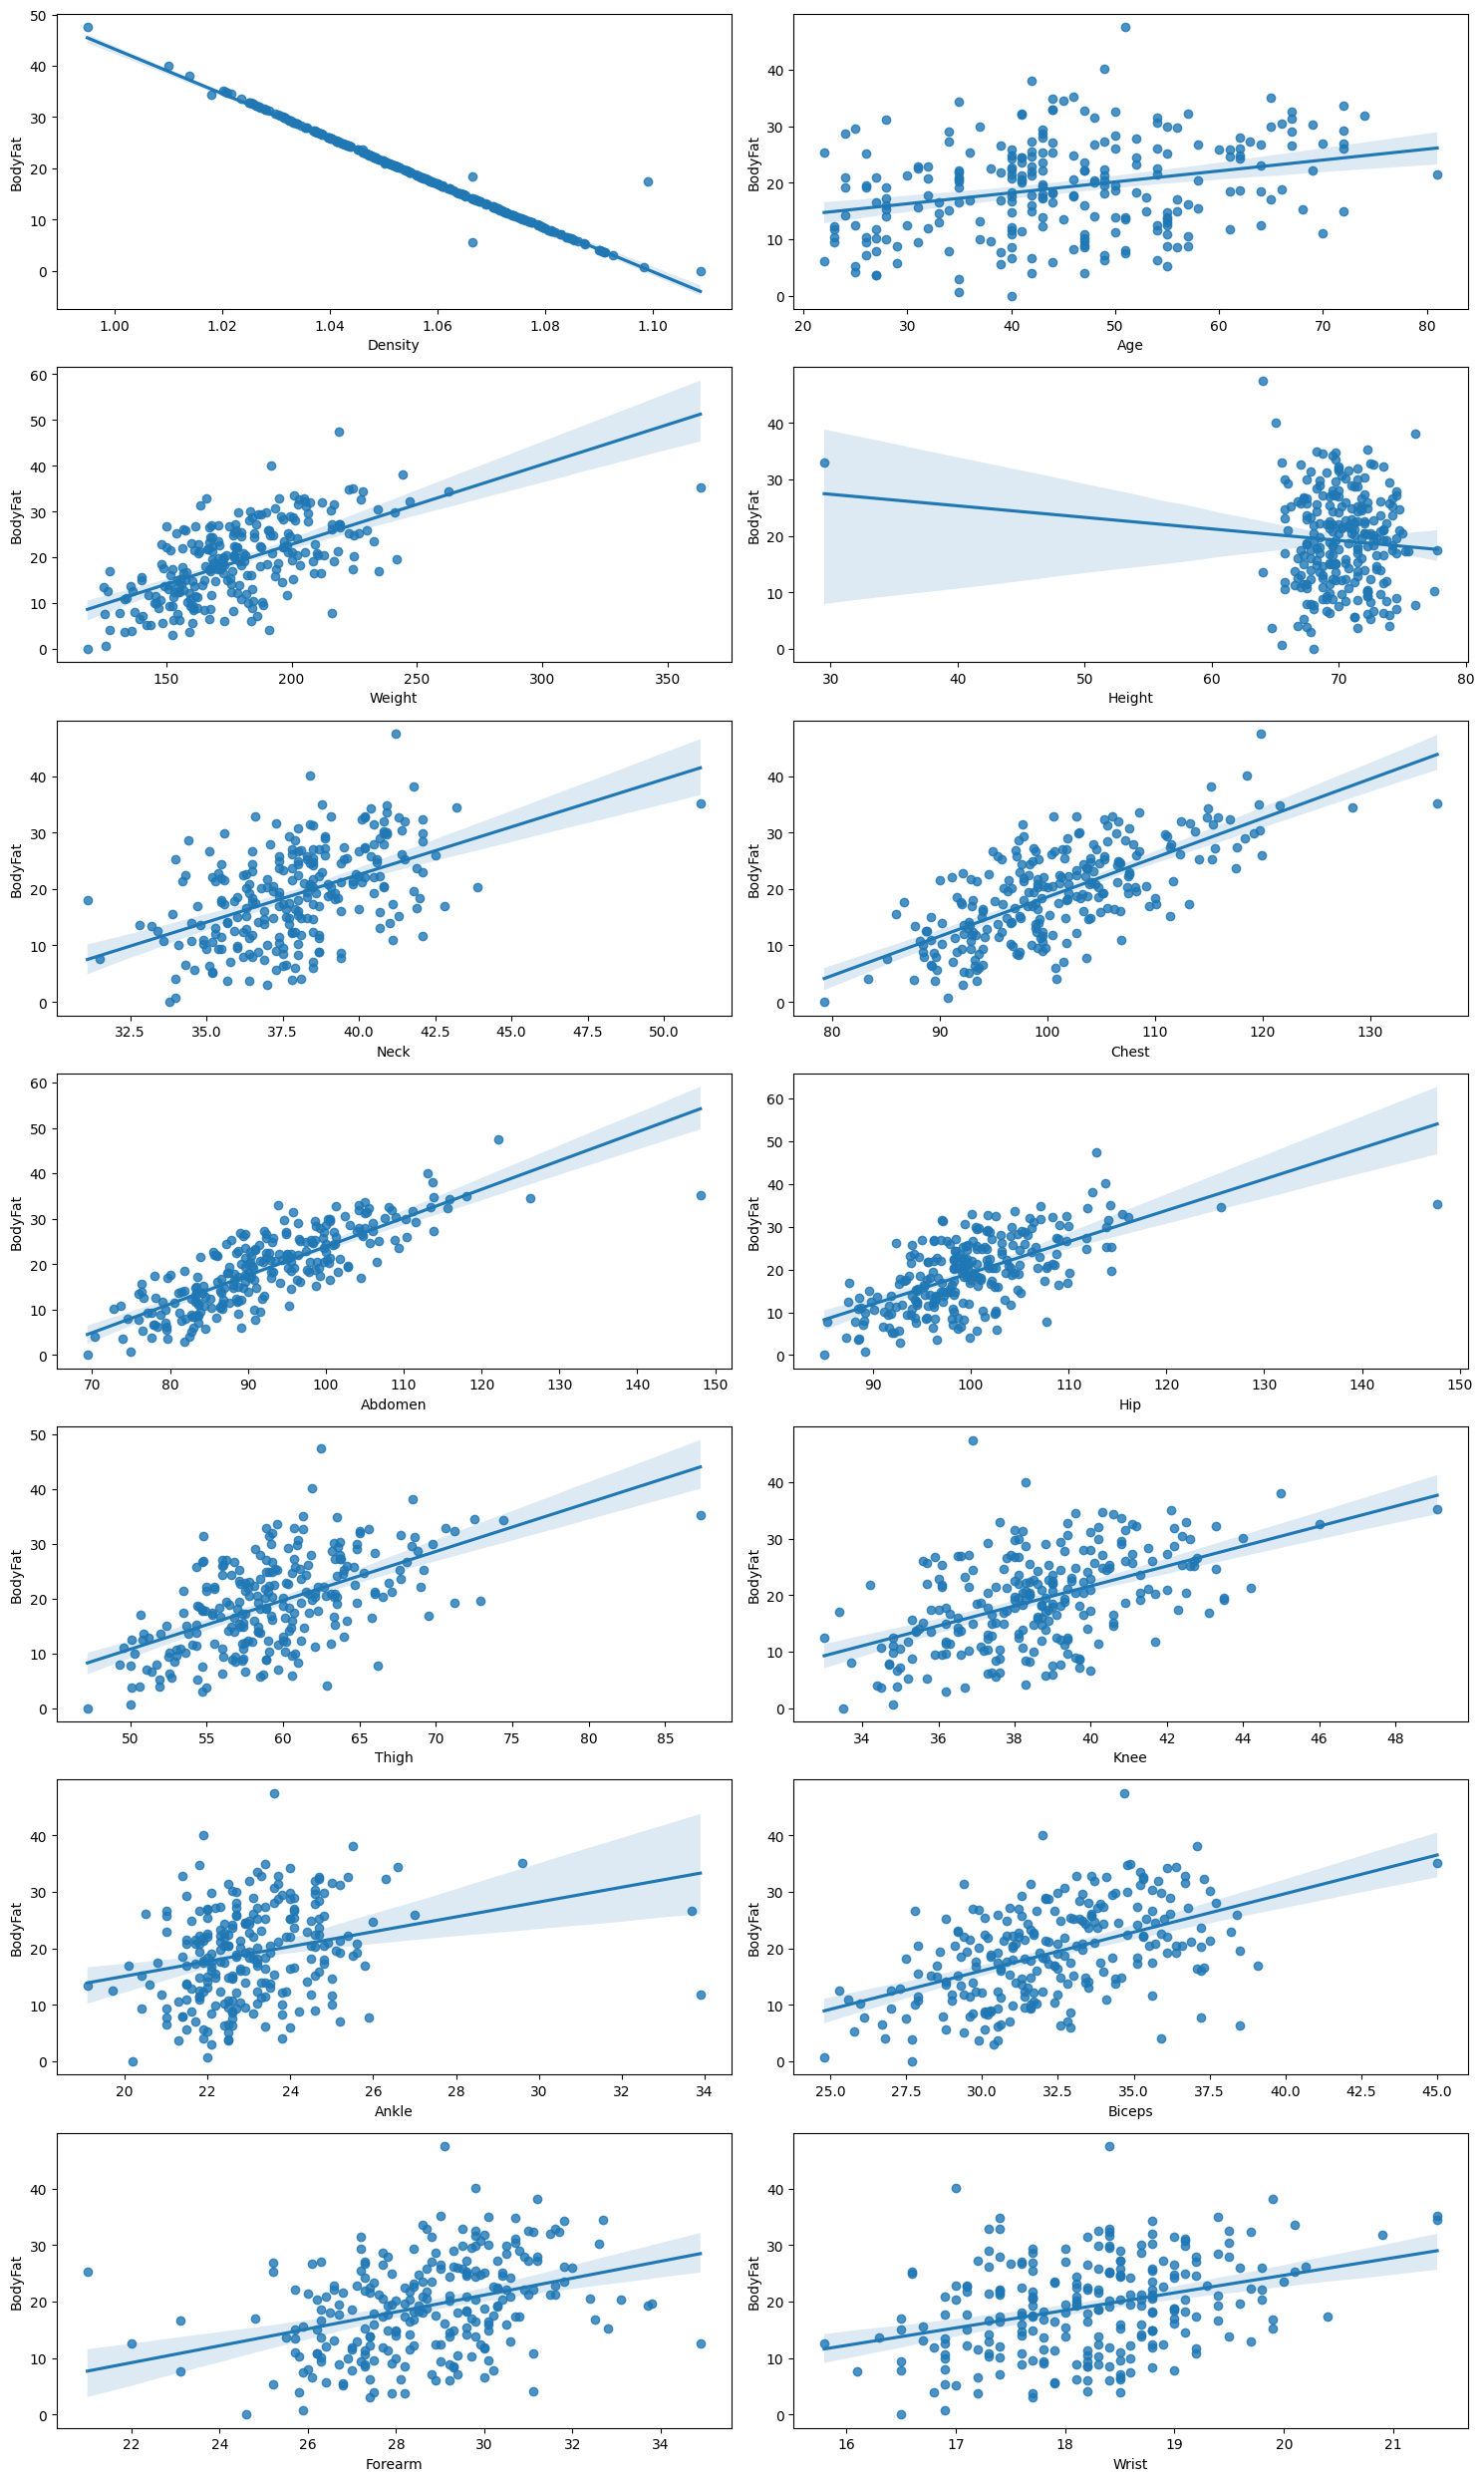

In [178]:
plt.figure(figsize=(15,25))

for i, column in enumerate(df.columns.drop('BodyFat')):
    plt.subplot(7, 2, i + 1)
    sns.regplot(data=df, x=column, y='BodyFat')
    
plt.tight_layout();

# Menghapus Outliers

In [179]:
def remove_outlier(df, column_list):
    for col_name in column_list:
        q1 = df[col_name].quantile(0.25)
        q3 = df[col_name].quantile(0.75)
        iqr = q3 - q1
        low = q1 - iqr*1.5
        up = q3 + iqr*1.5
        df.loc[df[col_name] < low, col_name] = low
        df.loc[df[col_name] > up, col_name] = up
    
remove_outlier(df, df[df.columns.drop('BodyFat')])

# seleksi fitur

In [180]:
features = ['Density','Age','Weight','Height','Neck','Chest','Abdomen','Hip','Thigh','Knee','Ankle','Biceps','Forearm','Wrist']
x = df[features]
y = df['BodyFat']
x.shape, y.shape

((252, 14), (252,))

# split data training dan data testing

In [181]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(63,)

# membuat model regresi linier

In [182]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [183]:
score = lr.score(X_test, y_test)
print('Akurasi Model Regresi Linier = ', score*100,"%")

Akurasi Model Regresi Linier =  99.00364591243118 %


# membuat inputan model regresi linier

In [184]:
#Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
#1.0622 , 28,183.75,67.75 ,38.0,106.8,  89.6 ,102.4,64.2,38.7,22.9,37.2,30.5,18.5
input_data = np.array([[1.0622,28,183.75,67.75,38.0,106.8,89.6,102.4,64.2,38.7,22.9,37.2,30.5,18.5]])

prediction = lr.predict(input_data)
print("Estimasi Persentase Lemak Tubuh : ", prediction)

Estimasi Persentase Lemak Tubuh :  [16.29937873]


c:\Users\lizap\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [185]:
import pickle

filename = 'estimasi_bodyFat.sav'
pickle.dump(lr,open(filename,'wb'))